# Лабораторная работа 5
## Метод сеток решения волнового уравнения

## Задание 1

$$
\begin{cases} \frac {\partial^2 u}{\partial t^2} - \frac{E}{\rho}\frac {\partial^2 u}{\partial x^2} = 0, \ 0\le t \le T,\ 0 \le x\le L  \\ u(0, t) = 0 \\ u(L, t) = 0 \end{cases}
$$



В начальный момент времени тягу деформируют так, что продольное перемещение становится равным $ \Delta u$:

$$ u(x, 0) = - \frac{E}{\rho}\frac {\partial^2 u}{\partial x^2} $$

Аппроксимируем уравнение следующим образом:
    
$$
\frac {(u_{j}^{i+1} - 2\cdot u_j^i + u_{j}^{i-1})}{\tau^2} = \frac{E}{\rho} \frac {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)}{h_x^2}
$$

Получаем:
    
$$
u_{j}^{i+1} = \frac{\tau^2 E}{\rho h_x^2} {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)} + 2\cdot u_j^i - u_{j}^{i-1};
$$

Для этого найдем параболу проходящую через точки (0, 0), (0, L), ($ \Delta u $, L/2).

Такая парабола будет иметь вид: 
$$
u(x, 0) = \frac {-4 \cdot \Delta u}{L ^ 2} x ^ 2 + \frac {4 \cdot \Delta u}{L} x = \phi(x)
$$

Далее, по формуле Тейлора:

$$
u(x, \tau) = u(x, 0) + \tau * u_t'(x, 0) + \frac {\tau ^ 2}{2} u_t''(x, 0)
$$



$$
u(x, 0) = \phi(x)
$$

$$
u_t'(x, 0) = 0
$$

$$
u_t''(x, 0) = - \phi(x)
$$

Получаем:
$$
u(x, \tau) =  \phi_j * (1 - \frac {\tau ^ 2}{2})
$$

Зная значения $ u^{0}_{j} $ и $ u^{1}_{j}$ найдем функцию u с помощью явной схемы.

In [130]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [131]:
du = 0.2e-2
L = 18e-2
E = 120e9
rho = 5.9e3

T = 0.001
phi = lambda x: (-4 * du / L ** 2) * x ** 2 + (4 * du / L) * x
nx = 100
nt = 10000

def task1():
    dt = T / nt
    dx = L / nx
    C = np.sqrt(E / rho) * dt / dx
    if C > 1:
        print('Не выполнено условие сходимости.')
        return
    
    x_values = np.linspace(0, L, nx)
    
    A = np.zeros((nt, nx))
    A[0] = [phi(x) for x in x_values]
    A[1, 1:-1] = [phi(x_values[i]) * (1 - dt ** 2 / 2) for i in range(1, nx - 1)]

    for i in range(1, nt-1):
        A[i + 1, 1:-1] = C ** 2 * (A[i, 2:] - 2 * A[i, 1:-1] + A[i, :-2]) + 2 * A[i, 1:-1] - A[i-1, 1:-1]
    return A

In [132]:
def draw(x, y, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label, size=14)
    plt.ylabel(y_label, size=14)
    return plt

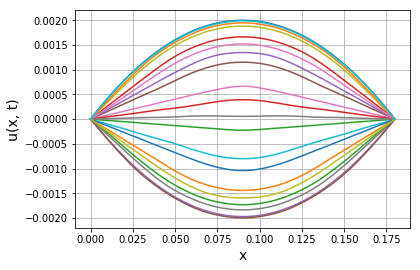

In [133]:
A = task1()

x_values = np.linspace(0, L, nx)
for i in range(0, nt, int(nt / 20)):
    draw(x_values, A[i], 'x', 'u(x, t)')
plt.grid()
plt.show()

## Задание 2

$$
\begin{cases} \frac {\partial^2 u}{\partial t^2} - (\frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2}) = 0, 0 \le t \le T, -\frac a 2 \le x \le \frac a 2, -\frac b 2 \le y \le \frac b 2
\\
u(t=0) = p(x, y),
\\
\frac {\partial u(t=0)}{\partial t} = q(x, y)
\\
u(x=-\frac{a}{2}) = 0, u(x=\frac{a}{2}) = 0,
\\
\frac{\partial u}{\partial n}(y=-\frac{b}{2}) = 0, \frac{\partial u}{\partial n}(y=\frac{b}{2}) = 0
\end{cases}
$$




Аппроксимируем задачу:

$$
\frac {u^{i+1}_{j,k} - 2\cdot u^i_{j,k} + u^{i-1}_{j,k}}{\tau ^2} = \frac{u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}}{h_x^2} + \frac{u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}}{h_y^2}
$$

Получаем: 

$$
u^{i+1}_{j,k} = \frac{\tau^2}{h_x^2} (u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}) + \frac{\tau^2}{h_y^2} (u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}) + 2\cdot u^i_{j,k} - u^{i-1}_{j,k};
$$

Исходя из начальных и граничных условий:

$
u_{j,k}^0 = p_{j,k}; 
$

$
u_{j,k}^1 = u_{j,k}^0 + \tau \cdot \frac {\partial u_{j,k}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j,k}^0}{\partial t^2} = p_{j, k} + \tau \cdot q_{j, k} + \frac {\tau^2}{2} (\frac {\partial^2 u_{j,k}}{\partial x^2} + \frac {\partial^2 u_{j,k}}{\partial y^2}) = p_{j, k} + \tau \cdot q_{j, k} + \frac {\tau^2}{2} (\frac {p_{j+1, k} - 2\cdot p_{j, k} + p_{j-1, k}} {h_x^2} + \frac {p_{j, k+1} - 2\cdot p_{j, k} + p_{j, k-1}} {h_y^2});  k = 1..n-1
$

Для нахождения $u(t, x, -\frac{b}{2})$ и $u(t, x, \frac{b}{2})$ на каждом слое рассмотрим граничные условия Неймана:
$\frac{\partial u}{\partial n}(y=-\frac{b}{2}) = 0, \frac{\partial u}{\partial n}(y=\frac{b}{2}) = 0$

$ \frac{\partial u}{\partial n} = \frac{\partial u}{\partial x} \cdot cos(\alpha) + \frac{\partial u}{\partial y} \cdot cos(\beta) $ 

Для y = $-\frac{b}{2}$ и аналогично для $\frac{b}{2}$ получим:

$ \frac{\partial u}{\partial y} (y = -\frac{b}{2}) = 0 $

Аппроксимируя, получаем:

$
u_{j,0}^i = u_{j,1}^i;
$

$
u_{j,K}^i = u_{j,K-1}^i;
$



In [185]:
a = 2
b = 1
p = lambda x, y: np.arctan(np.cos(np.pi * x / a))
q = lambda x, y: np.sin(2 * np.pi * x / a) * np.sin(np.pi * y / b)
T = 4
nx = 100
ny = 100
nt = 5000

def task_2():
    dt = T/nt
    dx = a/nx
    dy = b/ny
    
    C = dt/dx + dt/dy 
    if C > 1:
        print('Не выполнено условие сходимости.')
        return
    
    x_values = np.linspace(-a/2, a/2, nx)
    y_values = np.linspace(-b/2, b/2, ny)
    A = np.zeros((nt, nx, ny))

    for i in range(nx):
        for j in range(ny):
            A[0, i, j] = p(x_values[i], y_values[j])
            
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            A[1, i, j] = (p(x_values[i], y_values[j]) + q(x_values[i], y_values[j]) * dt
                          + dt ** 2 / (2 * dx ** 2) * (A[0, i + 1, j] - 2 * A[0, i, j] + A[0, i-1, j]) 
                          + dt ** 2 / (2 * dy ** 2) * (A[0, i, j + 1] - 2 * A[0, i, j] + A[0, i, j-1]))
            
    A[1, 1:-1, 0] = A[1, 1:-1, 1]
    A[1, 1:-1, -1] = A[1, 1:-1, -2]
    
    for t in range(1, nt - 1):
        A[t + 1, 1:-1, 1:-1] = (2 * A[t, 1:-1, 1:-1] - A[t-1, 1:-1, 1:-1] 
                        + dt ** 2 / dx ** 2 * (A[t, :-2, 1:-1]- 2 * A[t, 1:-1, 1:-1] + A[t, 2:, 1:-1])
                        + dt ** 2 / dy ** 2 * (A[t, 1:-1, :-2] - 2 * A[t, 1:-1, 1:-1] + A[t, 1:-1, 2:]))
        
        A[t + 1, 1:-1, 0] = A[t + 1, 1:-1, 1]
        A[t + 1, 1:-1, -1] = A[t + 1, 1:-1, -2]
    return A

In [186]:
A = task_2()

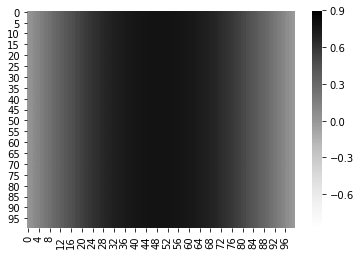

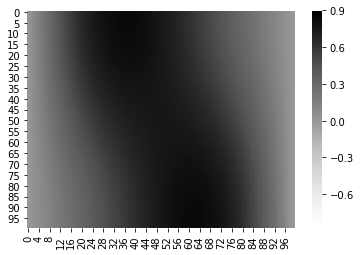

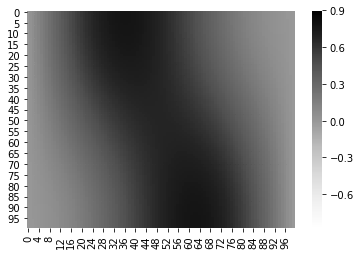

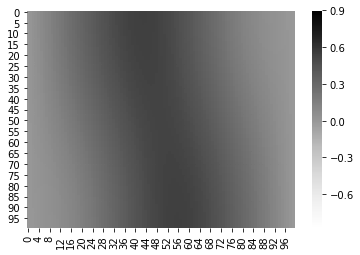

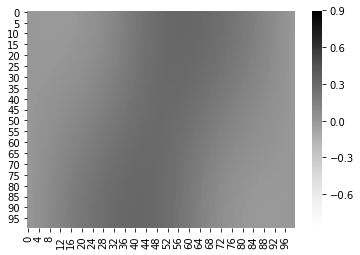

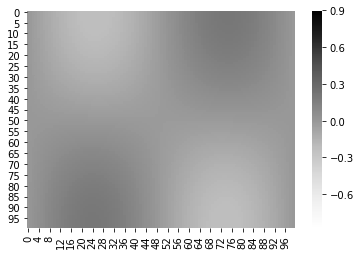

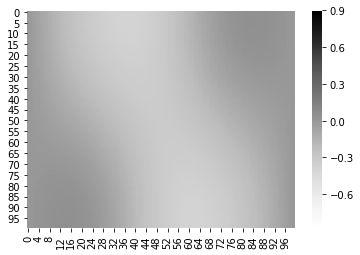

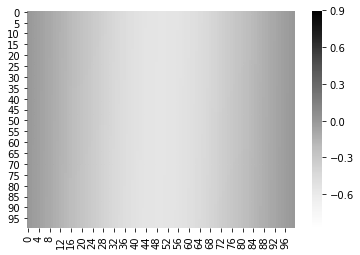

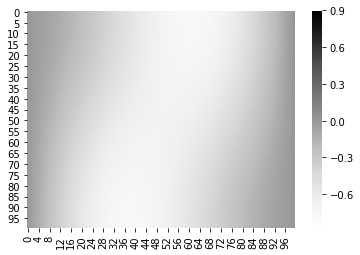

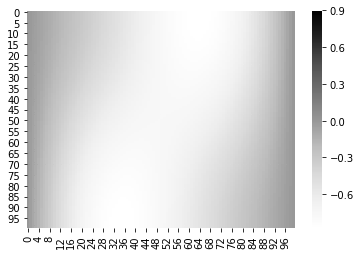

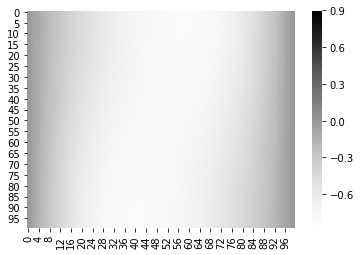

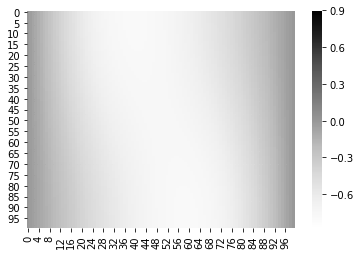

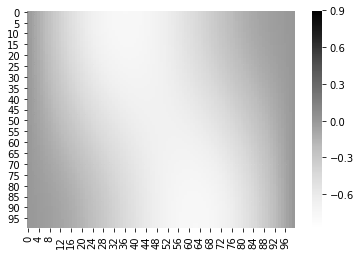

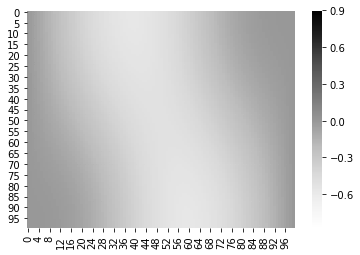

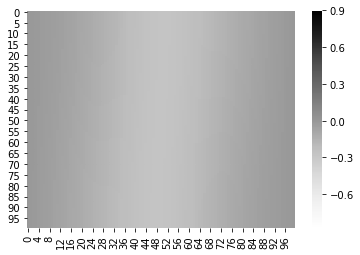

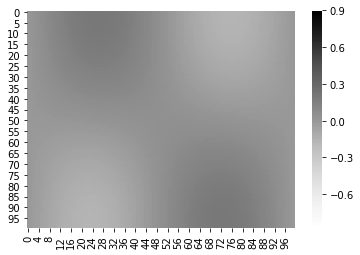

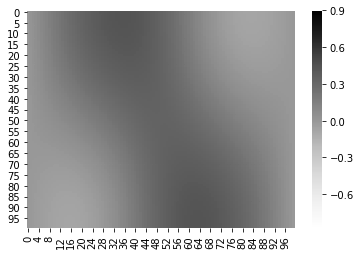

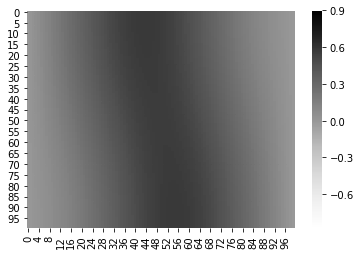

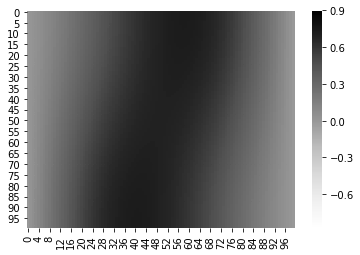

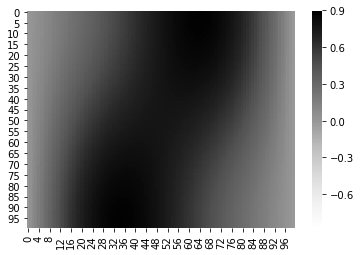

In [188]:
for i in range(0, len(A), 250):
    sns.heatmap(A[i].T, cmap='Greys', vmin=A.min(), vmax=A.max())
    plt.show()